In [0]:
# !pip install scikit-learn
# !pip install -U spacy
# !python -m spacy download en
# !python -m spacy download en_core_web_sm

## Data Cleaning Options
* Case Normalization
* Removing Stop Words
* Removing Punctuations or Special Symbols
* Lemmatization or Stemming
* Parts of Speech Tagging
* Entity Detection
* Bag of Words
* TF-IDF

### Bag of Words:
- The simplest methods of embedding words into numeical vectors. It is not often used in practice due to its oversimplication of languages.

![alt text](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

In [0]:
## Libraries
import spacy
from spacy import displacy

In [0]:
# en - load english language library and sm - load a small model
nlp = spacy.load('en_core_web_sm') 

In [0]:
text = "Apple, This is first sentence. and Google there is another one. here 3rd one is"

In [0]:
# call 
doc = nlp(text)
doc

Apple, This is first sentence. and Google there is another one. here 3rd one is

In [0]:
# Get tokens
for token in doc:
  print(token)

Apple
,
This
is
first
sentence
.
and
Google
there
is
another
one
.
here
3rd
one
is


In [0]:
# Get sentence
sent = nlp.create_pipe('sentencizer')

In [0]:
nlp.add_pipe(sent, before='parser')

In [0]:
doc = nlp(text)
for sente in doc.sents:
  print(sente)

Apple, This is first sentence.
and Google there is another one.
here 3rd one is


## Stop Words

In [0]:
# Stop words
from spacy.lang.en.stop_words import STOP_WORDS

In [0]:
stopwords = list(STOP_WORDS)
print(stopwords)

['i', 'may', 'make', 'put', 'last', 'when', 'whither', 'doing', 'regarding', 'anyhow', 'under', 'that', 'me', "'d", 'various', 'others', 'than', 'the', 'through', '‘ve', 'mostly', 'fifteen', 'none', 'yourself', 'hereafter', '‘ll', 'call', 'before', 'always', 'down', 'something', 'hers', 'thereby', 'they', 'used', 'wherein', 'whoever', 'yours', 'are', 'been', 'towards', 'give', 'do', "n't", 'among', 'within', 'both', 'herein', 'nowhere', 'part', 'everything', 'eleven', 'name', 'did', 'whatever', 'enough', 'please', 're', 'everyone', 'also', 'still', 'well', 'keep', 'moreover', 'show', 'because', 'over', 'whereafter', 'thereupon', 'seeming', 'where', "'ll", 'beyond', 'amount', 'or', 'sometime', 'nothing', 'done', 'nobody', 'off', 'fifty', 'never', 'is', 'though', 'neither', 'whole', 'why', 'each', 'once', 'this', 'using', 'anywhere', 'but', 'you', 'often', 'since', 'ca', 'although', 'full', 'see', 'she', 'such', 'thence', 'twenty', 'he', 'say', 'behind', 'itself', 'own', 'if', 'another',

In [0]:
print(len(stopwords))

326


In [0]:
for token in doc:
  if token.is_stop == False:
    print(token)

Apple
,
sentence
.
Google
.
3rd


## Lemmatization

In [0]:
doc1 = nlp('run runs running runner')


In [0]:
for lem in doc1:
  print(f'{lem.text:{10}} {lem.lemma_:{5}}')

run        run  
runs       run  
running    run  
runner     runner


## Part of Speech - POS

In [0]:
doc2 = nlp('All is well at your end!')

In [0]:
for token in doc2:
  print(f'{token.text:{10}} {token.pos_:{5}}')

All        DET  
is         AUX  
well       ADV  
at         ADP  
your       DET  
end        NOUN 
!          PUNCT


In [0]:
# 
displacy.render(doc2, style = 'dep', jupyter=True)

## Entity Detection

In [0]:
doc7 = nlp("For three years in a row, the number of new foreign students enrolling in American universities has fallen. In the 2015-16 academic year, 300,743 new foreign students enrolled. That number dropped to 269,383 in 2018-19, a decline of 10.4 percent as per the data of Open Doors, the Institute of International Education's (IIE) annual report that tracks university enrollments. Nor is the situation likely to improve in the academic year currently underway given that a snapshot survey of 500 universities by the IIE this fall found declining enrollment — although full stats won't be available until later in 2020.")

In [0]:
doc7

For three years in a row, the number of new foreign students enrolling in American universities has fallen. In the 2015-16 academic year, 300,743 new foreign students enrolled. That number dropped to 269,383 in 2018-19, a decline of 10.4 percent as per the data of Open Doors, the Institute of International Education's (IIE) annual report that tracks university enrollments. Nor is the situation likely to improve in the academic year currently underway given that a snapshot survey of 500 universities by the IIE this fall found declining enrollment — although full stats won't be available until later in 2020.

In [0]:
displacy.render(doc7, style='ent', jupyter=True)

## Text Classification

In [0]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt
Saving imdb_labelled.txt to imdb_labelled.txt
Saving yelp_labelled.txt to yelp_labelled.txt


In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [0]:
data_yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)
data_yelp.head()

,0,1
0,Wow... Loved this place.,1.0
1,I learned that if an electric slicer is used t...,NaN
2,But they don't clean the chiles?,NaN
3,Crust is not good.,0.0
4,Not tasty and the texture was just nasty.,0.0


In [0]:
columns_name = ['Review', 'Sentiment']
data_yelp.columns = columns_name

data_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1.0
1,I learned that if an electric slicer is used t...,NaN
2,But they don't clean the chiles?,NaN
3,Crust is not good.,0.0
4,Not tasty and the texture was just nasty.,0.0


In [0]:
# shape of yelp
print("Shape:", data_yelp.shape)

Shape: (3729, 2)


In [0]:
## Amazon dataset
data_amazon = pd.read_csv("amazon_cells_labelled.txt", sep='\t', header=None)
data_amazon.columns = columns_name
data_amazon.head()

,Review,Sentiment
0,I try not to adjust the volume setting to avoi...,NaN
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
3,I thought Motorola made reliable products!.,NaN
4,Battery for Motorola Razr.,NaN


In [0]:
# shape of amazon
print("Shape:", data_amazon.shape)

Shape: (14609, 2)


In [0]:
## imdb dataset
data_imdb = pd.read_csv("imdb_labelled.txt", sep='\t', header=None)
data_imdb.columns = columns_name
data_imdb.head()

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [0]:
# shape of imdb dataset
print("Shape:", data_imdb.shape)

Shape: (748, 2)


In [0]:
## Combine all dataset

data = data_yelp.append([data_amazon, data_imdb], ignore_index=True)
data.shape

(19086, 2)

In [0]:
data.head()

,Review,Sentiment
0,Wow... Loved this place.,1.0
1,I learned that if an electric slicer is used t...,NaN
2,But they don't clean the chiles?,NaN
3,Crust is not good.,0.0
4,Not tasty and the texture was just nasty.,0.0


In [0]:
## Distrubution of sentiment
data['Sentiment'].value_counts(dropna=False)

NaN    16338
1.0     1386
0.0     1362
Name: Sentiment, dtype: int64

In [0]:
## Need to drop NaN
data = data.dropna(axis=0) # dropping rows with NaN

In [0]:
# check again
data['Sentiment'].value_counts(dropna=False)


Review       0
Sentiment    0
dtype: int64


In [0]:
print(data.isnull().sum())

Review       0
Sentiment    0
dtype: int64


## Tokenization

In [0]:
import string

In [0]:
# getting punctuation
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
## Data Cleaning
def text_data_cleaning(sentence):
  doc = nlp(sentence)


  tokens = []
  ## Lematized and converted text into lower format
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  ## Removing stop words and punctuation
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)

  return cleaned_tokens

In [0]:
# test Data cleaning
text_data_cleaning("       Hello,  how :::: are you. Like this video")

['hello', 'like', 'video']

## Vectorization Feature Engineering (TF-IDF)

In [0]:
from sklearn.svm import LinearSVC

In [0]:
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
LinearSVC_clf = LinearSVC()

In [0]:
## 
X = data['Review']
y = data['Sentiment']

In [0]:
# Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [0]:
X_train.shape, X_test.shape

((1923,), (825,))

In [0]:
# classifier with pipe
LinearSVC_clf_pipe = make_pipeline(tfidf, LinearSVC_clf )

In [0]:
LinearSVC_clf_pipe.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7fd743bef840>,
                                 use_idf=True, vocabulary=None)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                        

In [0]:
## Predict
y_pred = LinearSVC_clf_pipe.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       435
         1.0       0.78      0.76      0.77       390

    accuracy                           0.79       825
   macro avg       0.79      0.79      0.79       825
weighted avg       0.79      0.79      0.79       825

Confusion Matrix: 
 [[351  84]
 [ 92 298]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


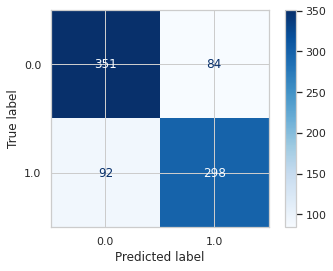

In [0]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

import seaborn as sns
sns.set(style="whitegrid")
plot_confusion_matrix(LinearSVC_clf_pipe, X_test, y_test, cmap='Blues', values_format='d')

In [0]:
## Test for real world

LinearSVC_clf_pipe.predict(['Wow, this is amazing lesson'])

array([1.])

In [0]:
LinearSVC_clf_pipe.predict(['Wow, this sucks'])

array([0.])

In [0]:
LinearSVC_clf_pipe.predict(['Worth watching it. I love absolutely love it'])

array([1.])